# 2023MCM-C Wordle

使用N-gram模型，以及马尔科夫链

In [1]:
#导入必要的包
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import plotly.express as px
from sklearn import preprocessing

## 导入数据

In [2]:
wordle=pd.read_excel('wordle_data.xlsx')
word_freq=pd.read_excel('word_freq.xlsx')
time_series=pd.read_excel('arima.xlsx')
n_gram=pd.read_excel('n-gram.xlsx',keep_default_na=False)
df_w=pd.read_excel('wordle.xlsx')
wordle_try=pd.read_excel('wordle_try.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'wordle_data.xlsx'

## 导出数据

In [ ]:
n_gram.to_excel("n-gram.xlsx") #输出Excel文件

In [ ]:
wordle.to_excel("wordle.xlsx")

In [ ]:
df_w.to_excel('wordl.xlsx')

In [ ]:
wordle_try.to_excel('wordle_try.xlsx')

## 数据处理

In [ ]:
for i in range(len(n_gram)):
    n_gram['freq'].loc[i]=word_freq['count'].loc[word_freq['word']==n_gram['word'].loc[i]]



In [ ]:
n_gram['freq']=n_gram['freq']/63288263237
n_gram.to_excel("n-gram.xlsx") #输出Excel文件

# N-gram


## 首先计算n=1，unigram

### 获得每个字母的出现概率

In [ ]:
letter1=n_gram['letter1'].value_counts(normalize=True)
letter2=n_gram['letter2'].value_counts(normalize=True)
letter3=n_gram['letter3'].value_counts(normalize=True)
letter4=n_gram['letter4'].value_counts(normalize=True)
letter5=n_gram['letter5'].value_counts(normalize=True)

### 计算每个单词的难度，并输出到表中

In [ ]:
for i in range(len(n_gram)):
    a=n_gram['word'].iloc[i][0]
    b=n_gram['word'].iloc[i][1]
    c=n_gram['word'].iloc[i][2]
    d=n_gram['word'].iloc[i][3]
    e=n_gram['word'].iloc[i][4]
    
    p_a=n_gram['freq'].loc[n_gram['letter1']==a].sum()+n_gram['freq'].loc[n_gram['letter2']==a].sum()+n_gram['freq'].loc[n_gram['letter3']==a].sum()+n_gram['freq'].loc[n_gram['letter4']==a].sum()+n_gram['freq'].loc[n_gram['letter5']==a].sum()
    p_b=n_gram['freq'].loc[n_gram['letter1']==b].sum()+n_gram['freq'].loc[n_gram['letter2']==b].sum()+n_gram['freq'].loc[n_gram['letter3']==b].sum()+n_gram['freq'].loc[n_gram['letter4']==b].sum()+n_gram['freq'].loc[n_gram['letter5']==b].sum()
    p_c=n_gram['freq'].loc[n_gram['letter1']==c].sum()+n_gram['freq'].loc[n_gram['letter2']==c].sum()+n_gram['freq'].loc[n_gram['letter3']==c].sum()+n_gram['freq'].loc[n_gram['letter4']==c].sum()+n_gram['freq'].loc[n_gram['letter5']==c].sum()
    p_d=n_gram['freq'].loc[n_gram['letter1']==d].sum()+n_gram['freq'].loc[n_gram['letter2']==d].sum()+n_gram['freq'].loc[n_gram['letter3']==d].sum()+n_gram['freq'].loc[n_gram['letter4']==d].sum()+n_gram['freq'].loc[n_gram['letter5']==d].sum()
    p_e=n_gram['freq'].loc[n_gram['letter1']==e].sum()+n_gram['freq'].loc[n_gram['letter2']==e].sum()+n_gram['freq'].loc[n_gram['letter3']==e].sum()+n_gram['freq'].loc[n_gram['letter4']==e].sum()+n_gram['freq'].loc[n_gram['letter5']==e].sum()
    
    log_p1=np.log(p_a)+np.log(p_b)+np.log(p_c)+np.log(p_d)+np.log(p_e)
    n_gram['n=1'].loc[i]=log_p1

    ppl1=(p_a*p_b*p_c*p_d*p_e)**(-0.2)
    n_gram['PPL1'].loc[i]=ppl1  


## 计算n=2,bigram

### 旧做法

In [ ]:
for i in range(len(n_gram)):
    #a1...5是每个字母出现的频数
    #p01,p12,p23,p34,p45,p50,是每个马尔科夫链的条件概率
    #log_p2为n=2时，p的对数
    a1=len(n_gram.loc[n_gram['letter1']==n_gram['word'].loc[i][0]])
    a2=len(n_gram.loc[n_gram['letter2']==n_gram['word'].loc[i][1]])
    a3=len(n_gram.loc[n_gram['letter3']==n_gram['word'].loc[i][2]])
    a4=len(n_gram.loc[n_gram['letter4']==n_gram['word'].loc[i][3]])
    a5=len(n_gram.loc[n_gram['letter5']==n_gram['word'].loc[i][4]])

    p01=letter1[n_gram['word'].loc[i][0]]
    p12=len(n_gram.loc[n_gram['letter1']==n_gram['word'].loc[i][0]].loc[n_gram['letter2']==n_gram['word'].loc[i][1]])/a1
    p23=len(n_gram.loc[n_gram['letter2']==n_gram['word'].loc[i][1]].loc[n_gram['letter3']==n_gram['word'].loc[i][2]])/a2
    p34=len(n_gram.loc[n_gram['letter3']==n_gram['word'].loc[i][2]].loc[n_gram['letter4']==n_gram['word'].loc[i][3]])/a3
    p45=len(n_gram.loc[n_gram['letter4']==n_gram['word'].loc[i][3]].loc[n_gram['letter5']==n_gram['word'].loc[i][4]])/a4

    # 计算概率
    log_p2=np.log(p01)+np.log(p12)+np.log(p23)+np.log(p34)+np.log(p45)
    n_gram['n=2'].loc[i]=log_p2
    
#n_gram.to_excel("n_gram.xlsx") #输出Excel文件



## 新做法

In [ ]:
for i in range(len(n_gram)):
    #两个字母的库
    a=n_gram['word'].iloc[i][0]+n_gram['word'].iloc[i][1]
    b=n_gram['word'].iloc[i][1]+n_gram['word'].iloc[i][2]
    c=n_gram['word'].iloc[i][2]+n_gram['word'].iloc[i][3]
    d=n_gram['word'].iloc[i][3]+n_gram['word'].iloc[i][4]
    #一个字母的库
    a0=n_gram['word'].iloc[i][0]
    b0=n_gram['word'].iloc[i][1]
    c0=n_gram['word'].iloc[i][2]
    d0=n_gram['word'].iloc[i][3]
    e0=n_gram['word'].iloc[i][4]

    p_0=n_gram['freq'].loc[n_gram['letter1']==a0].sum()

    p_a1=n_gram['freq'].loc[n_gram['letter12']==a].sum()+n_gram['freq'].loc[n_gram['letter23']==a].sum()+n_gram['freq'].loc[n_gram['letter34']==a].sum()+n_gram['freq'].loc[n_gram['letter45']==a].sum()
    p_a2=n_gram['freq'].loc[n_gram['letter1']==a0].sum()+n_gram['freq'].loc[n_gram['letter2']==a0].sum()+n_gram['freq'].loc[n_gram['letter3']==a0].sum()+n_gram['freq'].loc[n_gram['letter4']==a0].sum()
    p_a=p_a1/p_a2

    p_b1=n_gram['freq'].loc[n_gram['letter12']==b].sum()+n_gram['freq'].loc[n_gram['letter23']==b].sum()+n_gram['freq'].loc[n_gram['letter34']==b].sum()+n_gram['freq'].loc[n_gram['letter45']==b].sum()
    p_b2=n_gram['freq'].loc[n_gram['letter1']==b0].sum()+n_gram['freq'].loc[n_gram['letter2']==b0].sum()+n_gram['freq'].loc[n_gram['letter3']==b0].sum()+n_gram['freq'].loc[n_gram['letter4']==b0].sum()
    p_b=p_b1/p_b2

    p_c1=n_gram['freq'].loc[n_gram['letter12']==c].sum()+n_gram['freq'].loc[n_gram['letter23']==c].sum()+n_gram['freq'].loc[n_gram['letter34']==c].sum()+n_gram['freq'].loc[n_gram['letter45']==c].sum()
    p_c2=n_gram['freq'].loc[n_gram['letter1']==c0].sum()+n_gram['freq'].loc[n_gram['letter2']==c0].sum()+n_gram['freq'].loc[n_gram['letter3']==c0].sum()+n_gram['freq'].loc[n_gram['letter4']==c0].sum()
    p_c=p_c1/p_c2

    p_d1=n_gram['freq'].loc[n_gram['letter12']==d].sum()+n_gram['freq'].loc[n_gram['letter23']==d].sum()+n_gram['freq'].loc[n_gram['letter34']==d].sum()+n_gram['freq'].loc[n_gram['letter45']==d].sum()
    p_d2=n_gram['freq'].loc[n_gram['letter1']==d0].sum()+n_gram['freq'].loc[n_gram['letter2']==d0].sum()+n_gram['freq'].loc[n_gram['letter3']==d0].sum()+n_gram['freq'].loc[n_gram['letter4']==d0].sum()
    p_d=p_d1/p_d2

    log_p2=np.log(p_0)+np.log(p_a)+np.log(p_b)+np.log(p_c)+np.log(p_d)
    n_gram['n=2'].loc[i]=log_p2

    ppl2=(p_a*p_b*p_c*p_d)**(-0.25)
    n_gram['PPL2'].loc[i]=ppl2
    

## 计算n=3，trigram

### 旧做法

In [ ]:
for i in range(len(n_gram)):
    #b1...5是每个字母出现的频数
    #p012,p123,p234,p345,p450是每个马尔科夫链的条件概率
    #log_p3为n=3时，p的对数
    b1=len(n_gram.loc[n_gram['letter1']==n_gram['word'].loc[i][0]].loc[n_gram['letter2']==n_gram['word'].loc[i][1]])
    b2=len(n_gram.loc[n_gram['letter2']==n_gram['word'].loc[i][1]].loc[n_gram['letter3']==n_gram['word'].loc[i][2]])
    b3=len(n_gram.loc[n_gram['letter3']==n_gram['word'].loc[i][2]].loc[n_gram['letter4']==n_gram['word'].loc[i][3]])
    b4=len(n_gram.loc[n_gram['letter4']==n_gram['word'].loc[i][3]].loc[n_gram['letter5']==n_gram['word'].loc[i][4]])

    if b1*b2*b3*b4==0:
        log_p3=-20
    else:
        p012=len(n_gram.loc[n_gram['letter1']==n_gram['word'].loc[i][0]].loc[n_gram['letter2']==n_gram['word'].loc[i][1]])/len(word_freq)
        p123=len(n_gram.loc[n_gram['letter1']==n_gram['word'].loc[i][0]].loc[n_gram['letter2']==n_gram['word'].loc[i][1]].loc[n_gram['letter3']==n_gram['word'].loc[i][2]])/b1
        p234=len(n_gram.loc[n_gram['letter2']==n_gram['word'].loc[i][1]].loc[n_gram['letter3']==n_gram['word'].loc[i][2]].loc[n_gram['letter4']==n_gram['word'].loc[i][3]])/b2
        p345=len(n_gram.loc[n_gram['letter3']==n_gram['word'].loc[i][2]].loc[n_gram['letter4']==n_gram['word'].loc[i][3]].loc[n_gram['letter5']==n_gram['word'].loc[i][4]])/b3

        # 计算概率
        if p012*p123*p234*p345==0:
            log_p3=-20
        else:
            log_p3=np.log(p012)+np.log(p123)+np.log(p234)+np.log(p345)
            
    n_gram['n=3'].loc[i]=log_p3
    
#n_gram.to_excel("n_gram.xlsx") #输出Excel文件


### 新做法

In [ ]:
for i in range(len(n_gram)):
    #三个字母的库
    a=n_gram['word'].iloc[i][0]+n_gram['word'].iloc[i][1]+n_gram['word'].iloc[i][2]
    b=n_gram['word'].iloc[i][1]+n_gram['word'].iloc[i][2]+n_gram['word'].iloc[i][3]
    c=n_gram['word'].iloc[i][2]+n_gram['word'].iloc[i][3]+n_gram['word'].iloc[i][4]
   
    #两个字母的库
    a0=n_gram['word'].iloc[i][0]+n_gram['word'].iloc[i][1]
    b0=n_gram['word'].iloc[i][1]+n_gram['word'].iloc[i][2]
    c0=n_gram['word'].iloc[i][2]+n_gram['word'].iloc[i][3]
    d0=n_gram['word'].iloc[i][3]+n_gram['word'].iloc[i][4]


    p_0=n_gram['freq'].loc[n_gram['letter12']==a0].sum()

    p_a1=n_gram['freq'].loc[n_gram['letter123']==a].sum()+n_gram['freq'].loc[n_gram['letter234']==a].sum()+n_gram['freq'].loc[n_gram['letter345']==a].sum()
    p_a2=n_gram['freq'].loc[n_gram['letter12']==a0].sum()+n_gram['freq'].loc[n_gram['letter23']==a0].sum()+n_gram['freq'].loc[n_gram['letter34']==a0].sum()
    p_a=p_a1/p_a2

    p_b1=n_gram['freq'].loc[n_gram['letter123']==b].sum()+n_gram['freq'].loc[n_gram['letter234']==b].sum()+n_gram['freq'].loc[n_gram['letter345']==b].sum()
    p_b2=n_gram['freq'].loc[n_gram['letter12']==b0].sum()+n_gram['freq'].loc[n_gram['letter23']==b0].sum()+n_gram['freq'].loc[n_gram['letter34']==b0].sum()
    p_b=p_b1/p_b2

    p_c1=n_gram['freq'].loc[n_gram['letter123']==c].sum()+n_gram['freq'].loc[n_gram['letter234']==c].sum()+n_gram['freq'].loc[n_gram['letter345']==c].sum()
    p_c2=n_gram['freq'].loc[n_gram['letter12']==c0].sum()+n_gram['freq'].loc[n_gram['letter23']==c0].sum()+n_gram['freq'].loc[n_gram['letter34']==c0].sum()
    p_c=p_c1/p_c2


    log_p3=np.log(p_0)+np.log(p_a)+np.log(p_b)+np.log(p_c)
    n_gram['n=3'].loc[i]=log_p3

    ppl3=(p_a*p_b*p_c)**(-1/3)
    n_gram['PPL3'].loc[i]=ppl3
    
 

## 计算n=4，4-gram

## 旧做法

In [ ]:
for i in range(len(n_gram)):
    #b1...5是每个字母出现的频数
    #p012,p123,p234,p345,p450是每个马尔科夫链的条件概率
    #log_p3为n=4时，p的对数
    c1=len(n_gram.loc[n_gram['letter1']==n_gram['word'].loc[i][0]].loc[n_gram['letter2']==n_gram['word'].loc[i][1]].loc[n_gram['letter3']==n_gram['word'].loc[i][2]])
    c2=len(n_gram.loc[n_gram['letter2']==n_gram['word'].loc[i][1]].loc[n_gram['letter3']==n_gram['word'].loc[i][2]].loc[n_gram['letter4']==n_gram['word'].loc[i][3]])
    #c3=...不用求

    if c1*c2==0:
        log_p4=-20
    else:
        p0123=len(n_gram.loc[n_gram['letter1']==n_gram['word'].loc[i][0]].loc[n_gram['letter2']==n_gram['word'].loc[i][1]].loc[n_gram['letter3']==n_gram['word'].loc[i][2]])/len(word_freq)
        p1234=len(n_gram.loc[n_gram['letter1']==n_gram['word'].loc[i][0]].loc[n_gram['letter2']==n_gram['word'].loc[i][1]].loc[n_gram['letter3']==n_gram['word'].loc[i][2]].loc[n_gram['letter4']==n_gram['word'].loc[i][3]])/c1
        p2345=len(n_gram.loc[n_gram['letter2']==n_gram['word'].loc[i][1]].loc[n_gram['letter3']==n_gram['word'].loc[i][2]].loc[n_gram['letter4']==n_gram['word'].loc[i][3]].loc[n_gram['letter5']==n_gram['word'].loc[i][4]])/c2

        # 计算概率
        if p0123*p1234*p2345==0:
            log_p4=-20
        else:
            log_p4=np.log(p0123)+np.log(p1234)+np.log(p2345)
            
    n_gram['n=4'].loc[i]=log_p4
    
n_gram.to_excel("n_gram.xlsx") #输出Excel文件

## 新做法

In [ ]:
ppl4=0

for i in range(len(n_gram)):
    #四个字母的库
    a=n_gram['word'].iloc[i][0]+n_gram['word'].iloc[i][1]+n_gram['word'].iloc[i][2]+n_gram['word'].iloc[i][3]
    b=n_gram['word'].iloc[i][1]+n_gram['word'].iloc[i][2]+n_gram['word'].iloc[i][3]+n_gram['word'].iloc[i][4]

   
    #三个字母的库
    a0=n_gram['word'].iloc[i][0]+n_gram['word'].iloc[i][1]+n_gram['word'].iloc[i][2]
    b0=n_gram['word'].iloc[i][1]+n_gram['word'].iloc[i][2]+n_gram['word'].iloc[i][3]
    c0=n_gram['word'].iloc[i][2]+n_gram['word'].iloc[i][3]+n_gram['word'].iloc[i][4]


    p_0=n_gram['freq'].loc[n_gram['letter123']==a0].sum()

    p_a1=n_gram['freq'].loc[n_gram['letter1234']==a].sum()+n_gram['freq'].loc[n_gram['letter2345']==a].sum()
    p_a2=n_gram['freq'].loc[n_gram['letter123']==a0].sum()+n_gram['freq'].loc[n_gram['letter234']==a0].sum()
    p_a=p_a1/p_a2

    p_b1=n_gram['freq'].loc[n_gram['letter1234']==b].sum()+n_gram['freq'].loc[n_gram['letter2345']==b].sum()
    p_b2=n_gram['freq'].loc[n_gram['letter123']==b0].sum()+n_gram['freq'].loc[n_gram['letter234']==b0].sum()
    p_b=p_b1/p_b2

    log_p4=np.log(p_0)+np.log(p_a)+np.log(p_b)
    n_gram['n=4'].loc[i]=log_p4

    ppl4=(p_a*p_b)**(-0.5)
    n_gram['PPL4'].loc[i]=ppl4

## 困惑度评级

In [ ]:
n1=0
n2=0
n3=0
n4=0
for i in range(len(n_gram)):
    n1=n1+np.log(n_gram['PPL1'].iloc[i])
    n2=n2+np.log(n_gram['PPL2'].iloc[i])
    n3=n3+np.log(n_gram['PPL3'].iloc[i])
    n4=n4+np.log(n_gram['PPL4'].iloc[i])

n1=np.exp(n1/len(n_gram))
n2=np.exp(n2/len(n_gram))
n3=np.exp(n3/len(n_gram))
n4=np.exp(n4/len(n_gram))

In [ ]:
#作图
plt.plot(n_gram['word'],n_gram['PPL1'])

## 绘制n=3的图像

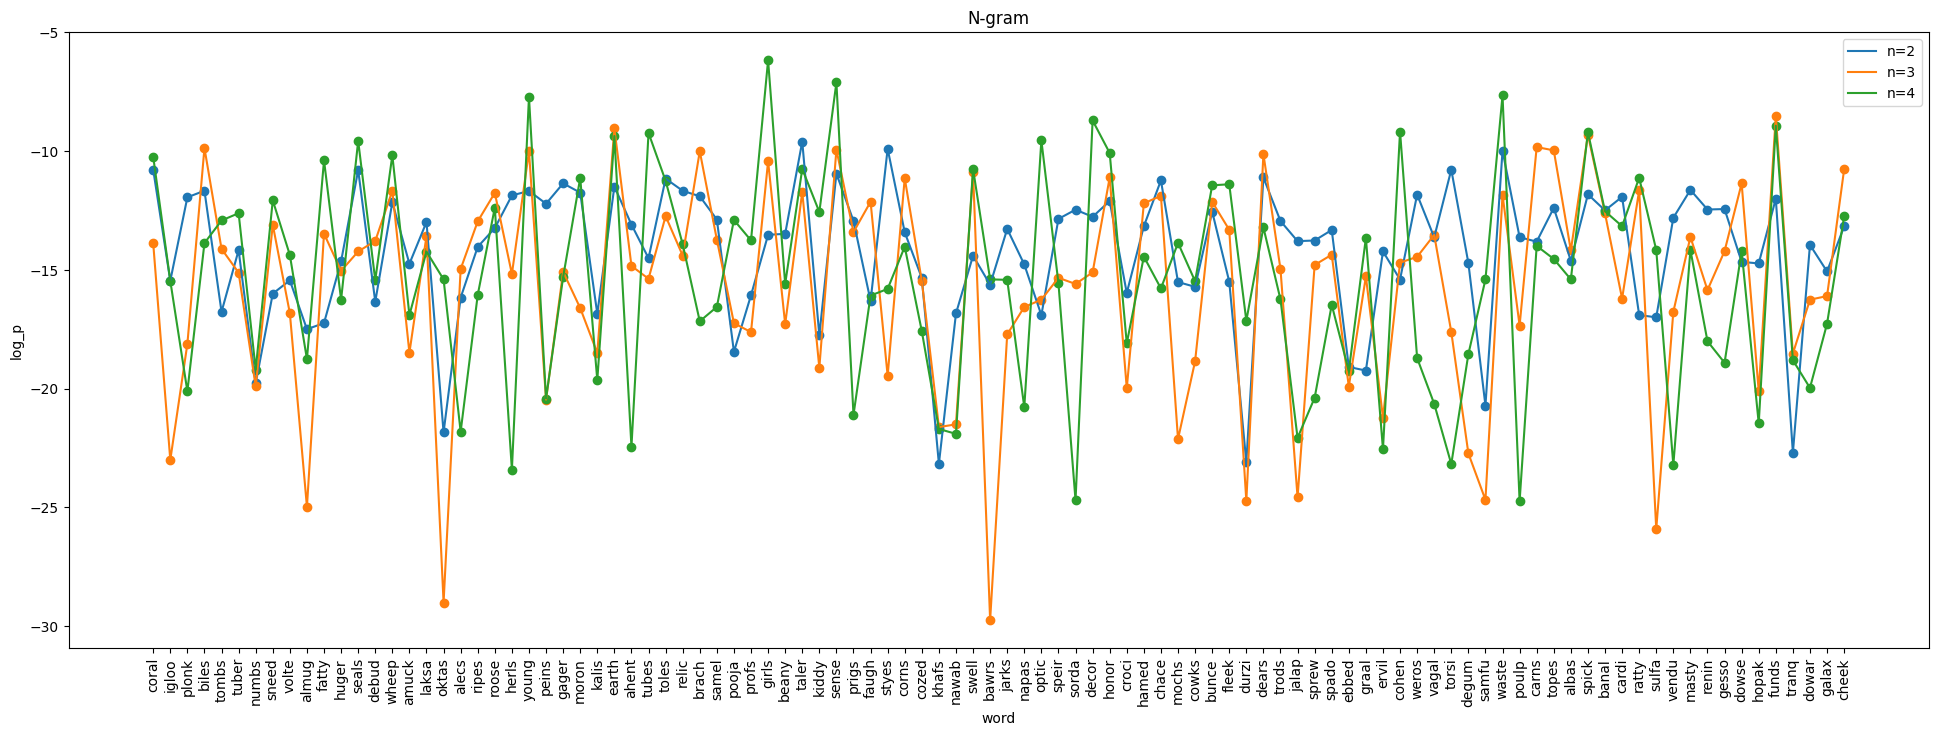

In [ ]:
import random
#设置图片大小
plt.figure(figsize=(24,8)) 
#绘制散点
wordn1=[]
pn1=[]

wordn2=[]
pn2=[]

wordn3=[]
pn3=[]

wordn4=[]
pn4=[]
for i in range(100):
    r=random.randint(1,len(n_gram))
    wordn1.append(n_gram['word'].loc[r])
    pn1.append(n_gram['n=1'].loc[r])

    wordn2.append(n_gram['word'].loc[r])
    pn2.append(n_gram['n=2'].loc[r])

    wordn3.append(n_gram['word'].loc[r])
    pn3.append(n_gram['n=3'].loc[r])

    wordn4.append(n_gram['word'].loc[r])
    pn4.append(n_gram['n=4'].loc[r])
#连线
plt.scatter(wordn2,pn2)
plt.plot(wordn2,pn2,label='n=2')

plt.scatter(wordn3,pn3)
plt.plot(wordn3,pn3,label='n=3')

plt.scatter(wordn4,pn4)
plt.plot(wordn4,pn4,label='n=4')


#设置标题，坐标轴
plt.title("N-gram")  
plt.xlabel("word")
plt.xticks(rotation=-270)
plt.ylabel("log_p")
plt.legend()


In [ ]:
import random
random.randint(1,10)

5

# 进行聚类分析

In [ ]:
#导入包
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets._samples_generator import make_blobs

#导入数据
batch_size = 45

df_stand=n_gram[['n=3','freq']].to_numpy()

## 进行聚类

In [ ]:
#进行kmeans聚类，分为5类

#k_means = KMeans(n_clusters=5).fit(df_stand)  #简易用法
n_clusters=10
k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10).fit(df_stand) 

t0 = time.time()
t_batch = time.time() - t0

k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(df_stand, k_means_cluster_centers)

#将分类加载到表中
n_gram['cluster']=k_means_labels

## 聚类可视化

### 原始数据图

In [ ]:
# plot result
fig = plt.figure(dpi=300,figsize=(20,4))

# original data
ax = fig.add_subplot(1,2,1)
row, _ = np.shape(df_stand)
for i in range(row):
    ax.plot(df_stand[i, 0], df_stand[i, 1] ,'#4EACC5', marker='.')

ax.set_title('Original Data Distribution')

plt.xlabel('Difficulty Factor')
plt.ylabel('Word Frequency')

### kmeans聚类图

In [ ]:
# plot result
fig = plt.figure(dpi=300,figsize=(20,4))

colors = ['#9400D3','#FF00FF','#FFC0CB','#0000CD','#FF1493','#7B68EE','#FFD700','#FFA500','#40E0D0','#4EACC5','#7FFF00']


# K-means
ax = fig.add_subplot(1, 2,1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k		# my_members是布尔型的数组（用于筛选同类的点，用不同颜色表示）
    cluster_center = k_means_cluster_centers[k]
    ax.plot(df_stand[my_members, 0], df_stand[my_members, 1], 'w',
            markerfacecolor=col, marker='.')	# 将同一类的点表示出来
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', marker='o',label=' ')	# 将聚类中心单独表示出来
ax.set_title('Divided into ten difficulty levels by using KMeans')
ax.legend()

plt.xlabel('Difficulty Levels')
plt.ylabel('Word Frequency')

## CH系数评估

In [ ]:
#calinski_harabaz_score需要更新包，使用calinski_harabasz_score则不会报错
from sklearn.metrics import calinski_harabasz_score

S=[]#存放分数的数组，用于画图
#定义CH检验函数
def CH_test(df):
    for i in range(2,50):
        #构建并训练模型
        kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10,random_state=123).fit(df)
        score = calinski_harabasz_score(df,kmeans.labels_)
        S.append(score)
        #print('数据聚%d类calinski_harabaz指数为:%f'%(i,score))
CH_test(df_stand)

plt.plot(range(2,50),S)

# 计算某个单词的难度

In [ ]:
#输入单词
word='eerie'

### n=2

In [ ]:
e1=len(n_gram.loc[n_gram['letter1']==word[0]])
e2=len(n_gram.loc[n_gram['letter2']==word[1]])
e3=len(n_gram.loc[n_gram['letter3']==word[2]])
e4=len(n_gram.loc[n_gram['letter4']==word[3]])
e5=len(n_gram.loc[n_gram['letter5']==word[4]])

p_0e=letter1['e']
p_ee=len(n_gram.loc[n_gram['letter1']==word[0]].loc[n_gram['letter2']==word[1]])/e1
p_er=len(n_gram.loc[n_gram['letter2']==word[1]].loc[n_gram['letter3']==word[2]])/e2
p_ri=len(n_gram.loc[n_gram['letter3']==word[2]].loc[n_gram['letter4']==word[3]])/e3
p_ie=len(n_gram.loc[n_gram['letter4']==word[3]].loc[n_gram['letter5']==word[4]])/e4

# 计算概率
np.log(p_0e)+np.log(p_ee)+np.log(p_er)+np.log(p_ri)+np.log(p_ie)


### n=3

In [ ]:
f1=len(n_gram.loc[n_gram['letter1']==word[0]].loc[n_gram['letter2']==word[1]])
f2=len(n_gram.loc[n_gram['letter2']==word[1]].loc[n_gram['letter3']==word[2]])
f3=len(n_gram.loc[n_gram['letter3']==word[2]].loc[n_gram['letter4']==word[3]])
f4=len(n_gram.loc[n_gram['letter4']==word[3]].loc[n_gram['letter5']==word[4]])


p_e012=len(n_gram.loc[n_gram['letter1']==word[0]].loc[n_gram['letter2']==word[1]])/len(word_freq)
p_e123=len(n_gram.loc[n_gram['letter1']==word[0]].loc[n_gram['letter2']==word[1]].loc[n_gram['letter3']==word[2]])/f1
p_e234=len(n_gram.loc[n_gram['letter2']==word[1]].loc[n_gram['letter3']==word[2]].loc[n_gram['letter4']==word[3]])/f2
p_e345=len(n_gram.loc[n_gram['letter3']==word[2]].loc[n_gram['letter4']==word[3]].loc[n_gram['letter5']==word[4]])/f3

# 计算概率

np.log(p_e012)+np.log(p_e123)+np.log(p_e234)+np.log(p_e345)

### n=4

In [ ]:
g1=len(n_gram.loc[n_gram['letter1']==word[0]].loc[n_gram['letter2']==word[1]].loc[n_gram['letter3']==word[2]])
g2=len(n_gram.loc[n_gram['letter2']==word[1]].loc[n_gram['letter3']==word[2]].loc[n_gram['letter4']==word[3]])

p_e0123=len(n_gram.loc[n_gram['letter1']==word[0]].loc[n_gram['letter2']==word[1]].loc[n_gram['letter3']==word[2]])/len(word_freq)
p_e1234=len(n_gram.loc[n_gram['letter1']==word[0]].loc[n_gram['letter2']==word[1]].loc[n_gram['letter3']==word[2]].loc[n_gram['letter4']==word[3]])/g1
p_e2345=len(n_gram.loc[n_gram['letter2']==word[1]].loc[n_gram['letter3']==word[2]].loc[n_gram['letter4']==word[3]].loc[n_gram['letter5']==word[4]])/g2

np.log(p_e0123)+np.log(p_e1234)+np.log(p_e2345)

In [ ]:
n_gram.to_excel("n_gram.xlsx") #输出Excel文件

# 预测报告数量

## 困难模式和单词难度的关系

In [ ]:
for i in range(len(wordle)):
    wordle['freq'].loc[i]=float(n_gram['freq'].loc[n_gram['word']==wordle['word'].loc[i]])

# 对每周数据做归一化

In [ ]:
for i in range(50):
    week=wordle['Number of  reported results'].loc[6+7*i]+wordle['Number of  reported results'].loc[7+7*i]+wordle['Number of  reported results'].loc[8+7*i]+wordle['Number of  reported results'].loc[9+7*i]+wordle['Number of  reported results'].loc[10+7*i]+wordle['Number of  reported results'].loc[11+7*i]+wordle['Number of  reported results'].loc[12+7*i]

    wordle['week avg'].loc[i]=week/7


C:\Users\86198\AppData\Local\Temp\ipykernel_1332\1905622451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordle['week avg'].loc[i]=week/7


In [ ]:
wordle['reports'].loc[6+7*i]=wordle['Number of  reported results'].loc[6+7*i]/week
wordle['reports'].loc[7+7*i]=wordle['Number of  reported results'].loc[7+7*i]/week
wordle['reports'].loc[8+7*i]=wordle['Number of  reported results'].loc[8+7*i]/week
wordle['reports'].loc[9+7*i]=wordle['Number of  reported results'].loc[9+7*i]/week
wordle['reports'].loc[10+7*i]=wordle['Number of  reported results'].loc[10+7*i]/week
wordle['reports'].loc[11+7*i]=wordle['Number of  reported results'].loc[11+7*i]/week
wordle['reports'].loc[12+7*i]=wordle['Number of  reported results'].loc[12+7*i]/week

0.145125 0.146178 0.144752 0.143599 0.145098 0.138321 0.137607

# 时间序列预测

## 报告随时间的趋势

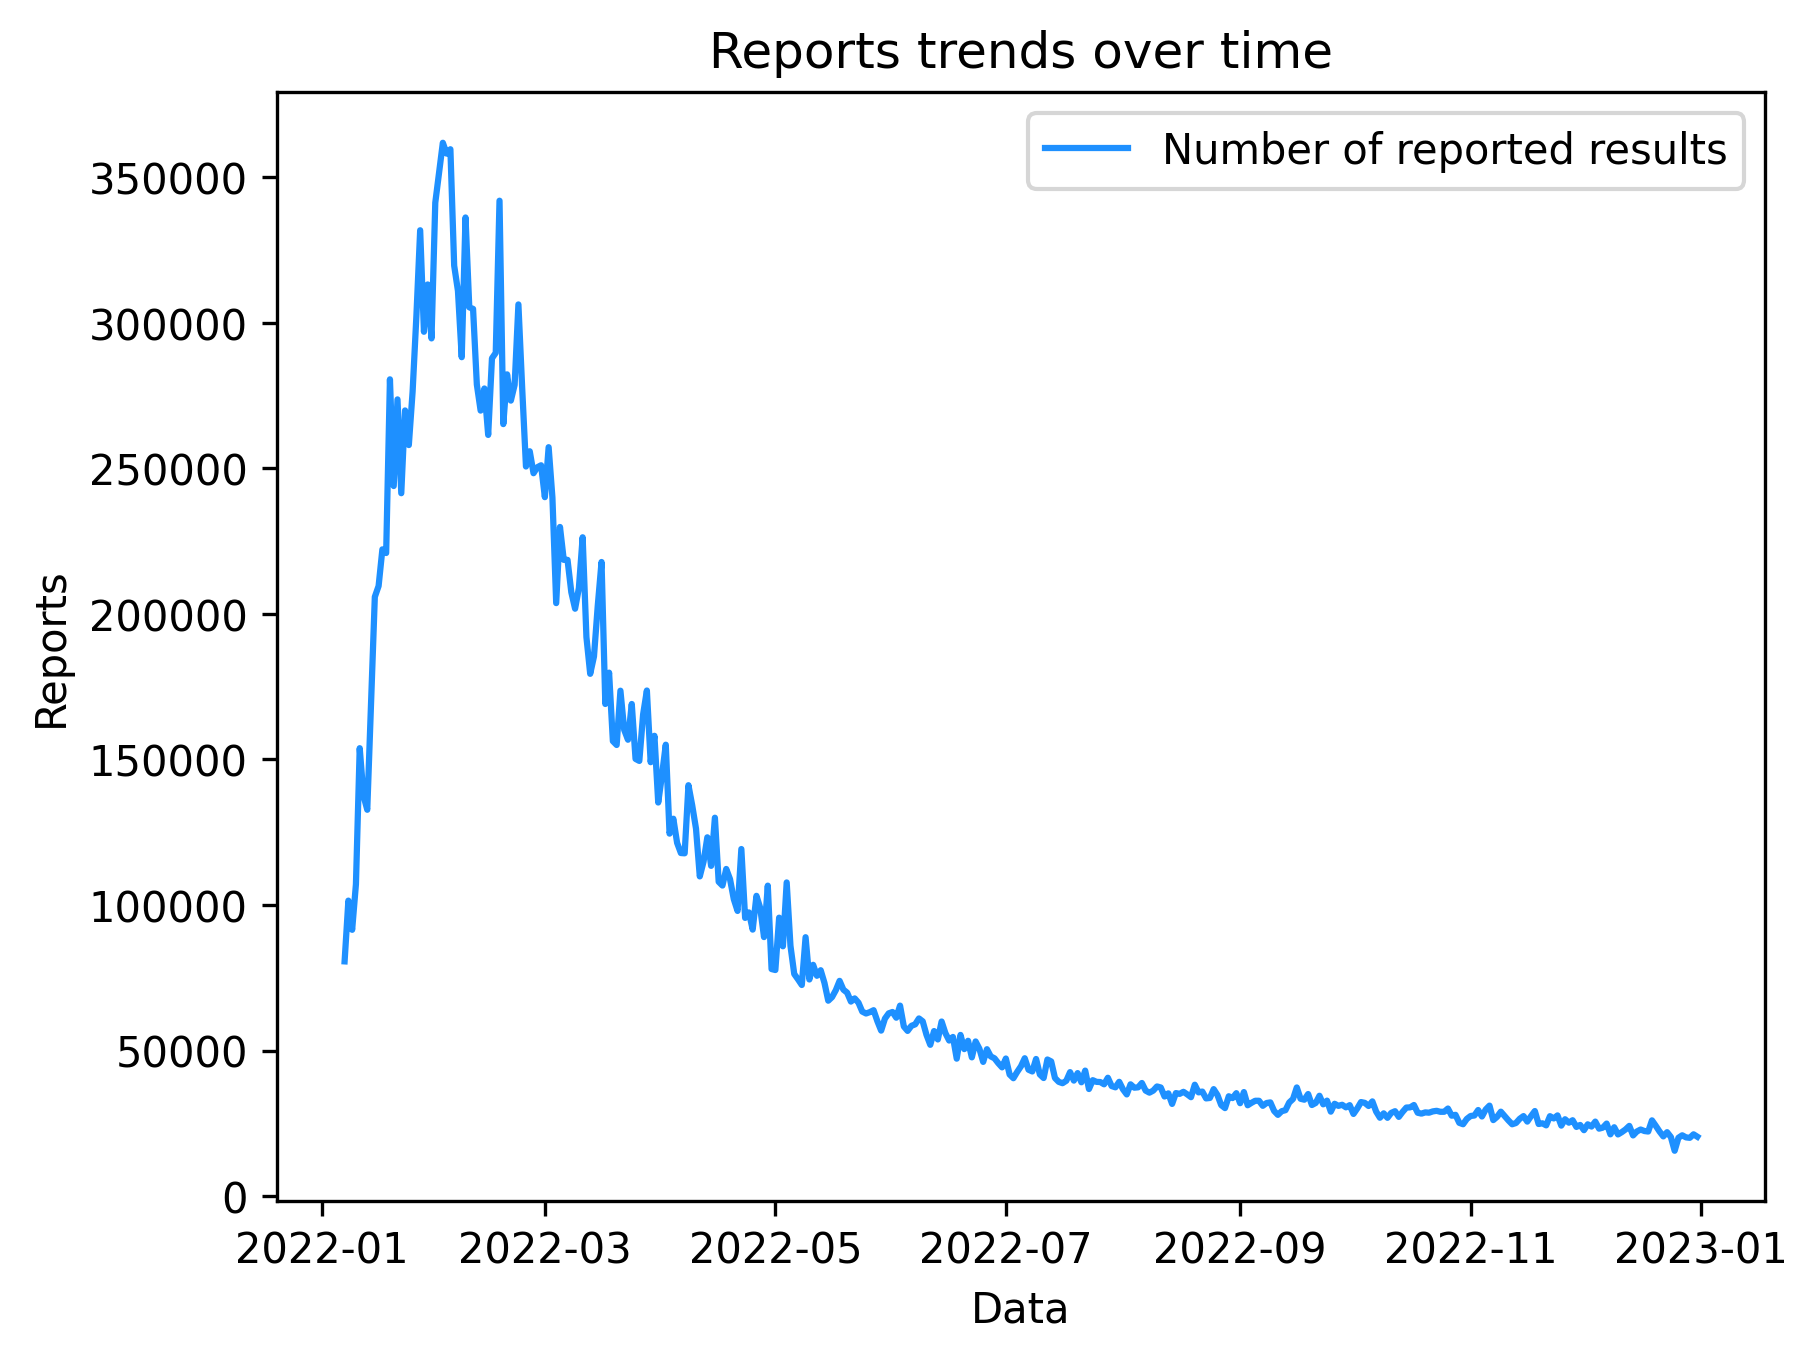

In [ ]:
plt.figure(dpi=300)
plt.plot(wordle['Date'],wordle['Number of  reported results'],label='Number of reported results',color='#1E90FF')
plt.title('Reports trends over time')
plt.ylabel('Reports')
plt.xlabel('Data')
plt.legend()





## 求导

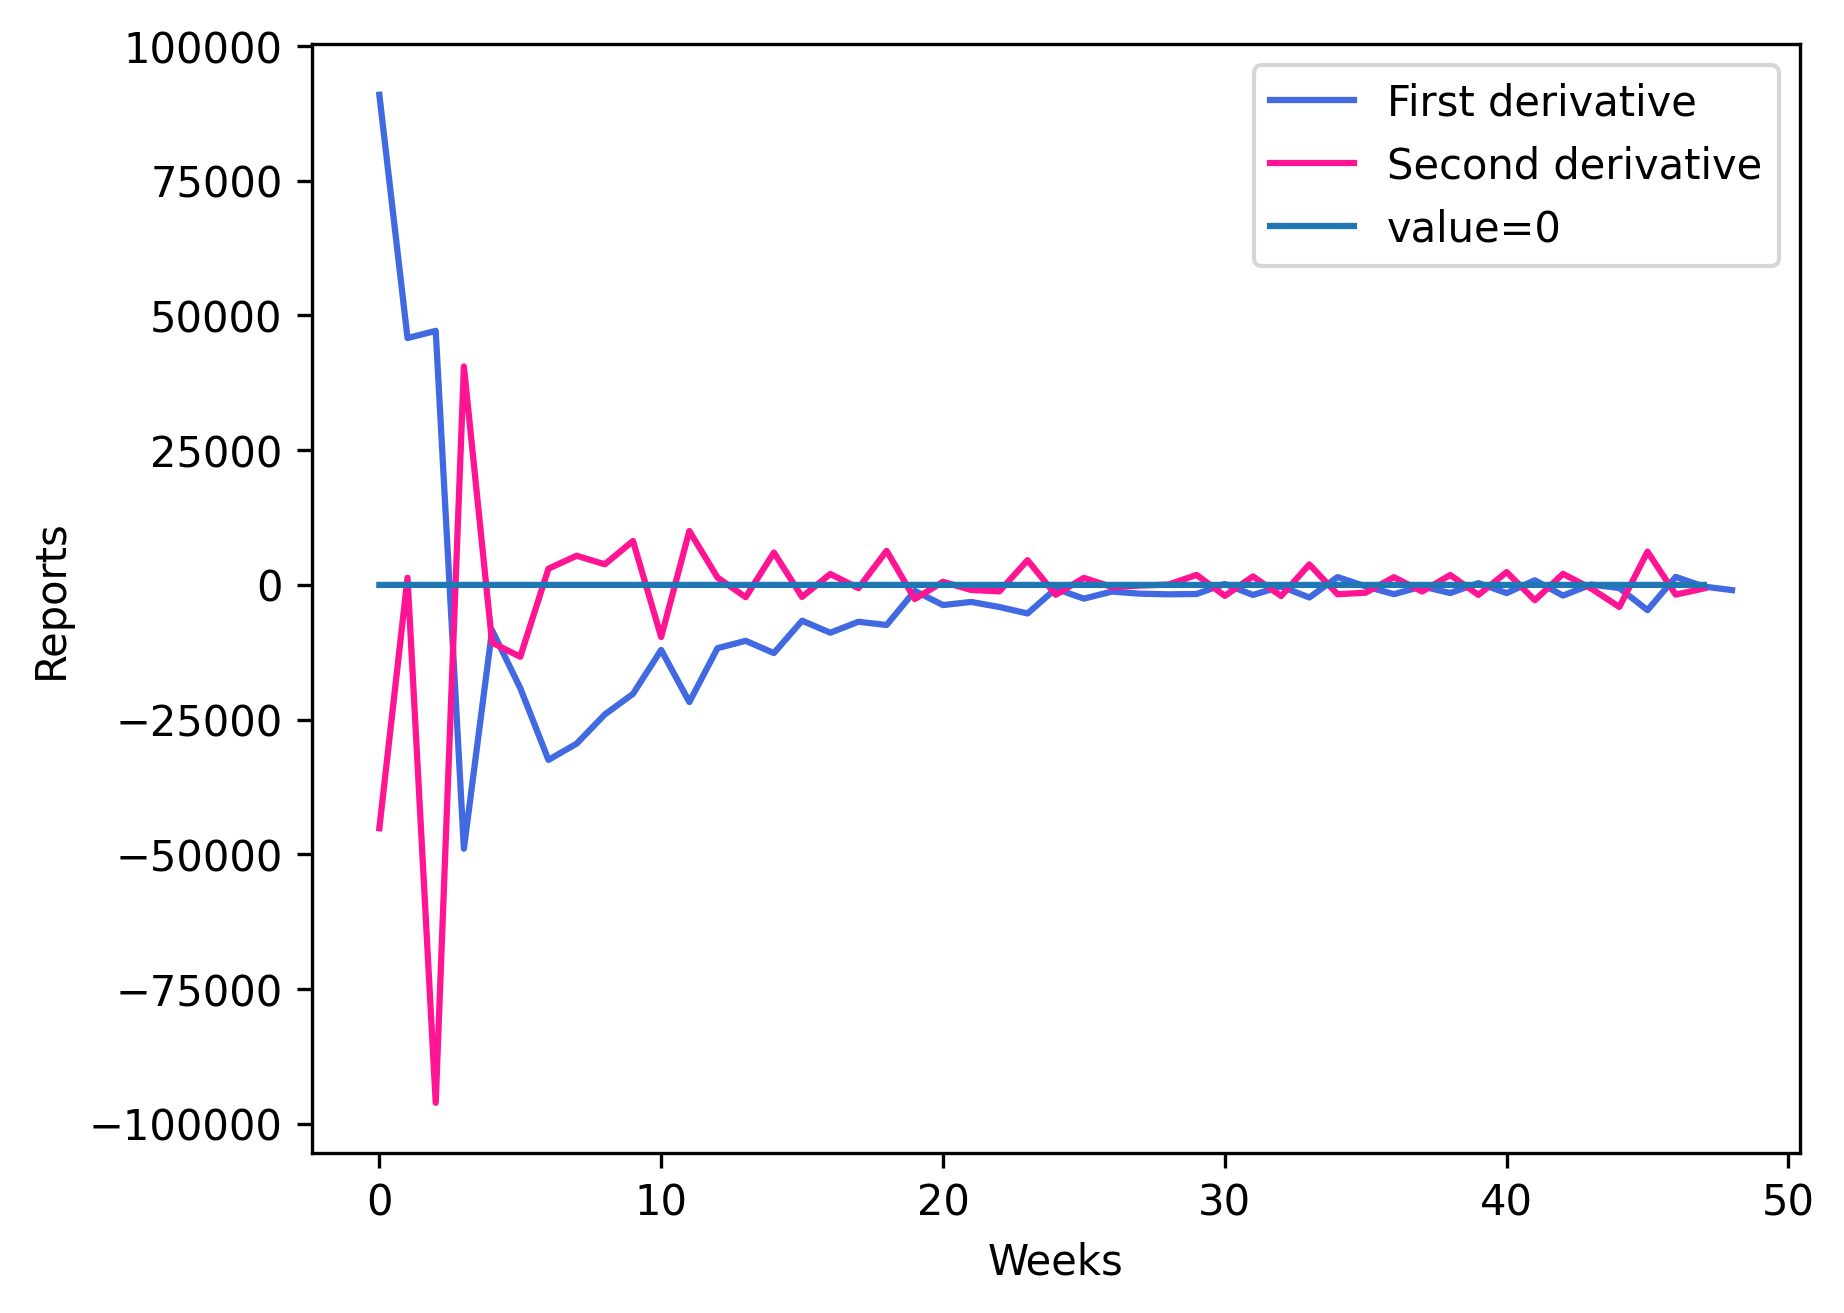

In [ ]:
# 构造示例时间序列数据
arima = pd.read_excel('arima.xlsx')
x = arima['Week']
y = arima['Number of result']

# 计算一阶和二阶导数
dy = np.diff(y)
ddy = np.diff(dy)

# 绘制一阶和二阶导数的变化曲线
plt.figure(dpi=300)
plt.plot(dy, color='#4169E1', label='First derivative')
plt.plot(ddy, color='#FF1493', label='Second derivative')
plt.plot(ddy>0,label='value=0')
plt.legend(loc='best')
plt.xlabel('Weeks')
plt.ylabel('Reports')
plt.show()

## 绘制置信区间95%

In [ ]:

# 定义函数
def f(x, a, b):
    return a * x ** b

# 设置参数范围和步长
a_range = np.linspace(1438000, 2196000, 100)
b_range = np.linspace(-1.191, -1.067, 100)
x_range = np.linspace(20, 59, 100)

# 计算函数值
y_range = np.zeros((len(a_range), len(b_range), len(x_range)))
for i, a in enumerate(a_range):
    for j, b in enumerate(b_range):
        y_range[i, j, :] = f(x_range, a, b)

# 计算均值和标准差
y_mean = np.mean(y_range, axis=(0, 1))
y_std = np.std(y_range, axis=(0, 1))

# 计算置信区间
z = 1.96  # 95% 置信区间对应的 z 值
y_upper = y_mean + z * y_std
y_lower = y_mean - z * y_std





# ARIMA(0,2,0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 读取时间序列数据
data = pd.read_excel('arima.xlsx', index_col=0, parse_dates=True)

# 构建ARIMA(0,2,0)模型
model = ARIMA(data, order=(0, 2, 0))

# 拟合模型并进行预测
results = model.fit()
pred = results.predict(start=20, end=len(data)+9)

c:\python3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# 灰色预测

In [ ]:
def predict(x0):
    n = len(x0)
    x1 = np.cumsum(x0)
    z = np.zeros(n-1)
    for i in range(n-1):
        z[i] = 0.5*(x1[i]+x1[i+1])
    B = [-z, [1]*(n-1)]
    Y = x0[1:]
    u = np.dot(np.linalg.inv(np.dot(B, np.transpose(B))),np.dot(B, Y))
    x1_solve = np.zeros(n)
    x0_solve = np.zeros(n)
    x1_solve[0] = x0_solve[0] = x0[0]
    for i in range(1, n):
        x1_solve[i] = (x0[0]-u[1]/u[0])*np.exp(-u[0]*i)+u[1]/u[0]
    for i in range(1, n):
        x0_solve[i] = x1_solve[i] - x1_solve[i-1]
    return x0_solve, x1_solve, u

data_gm=pd.read_excel('gm.xlsx')
x0 = np.array(data_gm.iloc[:,1])
x0_solve, x1_solve, u = predict(x0)
#plt.plot(x0_solve)
 


# 绘制预测图像

Text(0.5, 1.0, 'Predictions of the number of reports by three models')

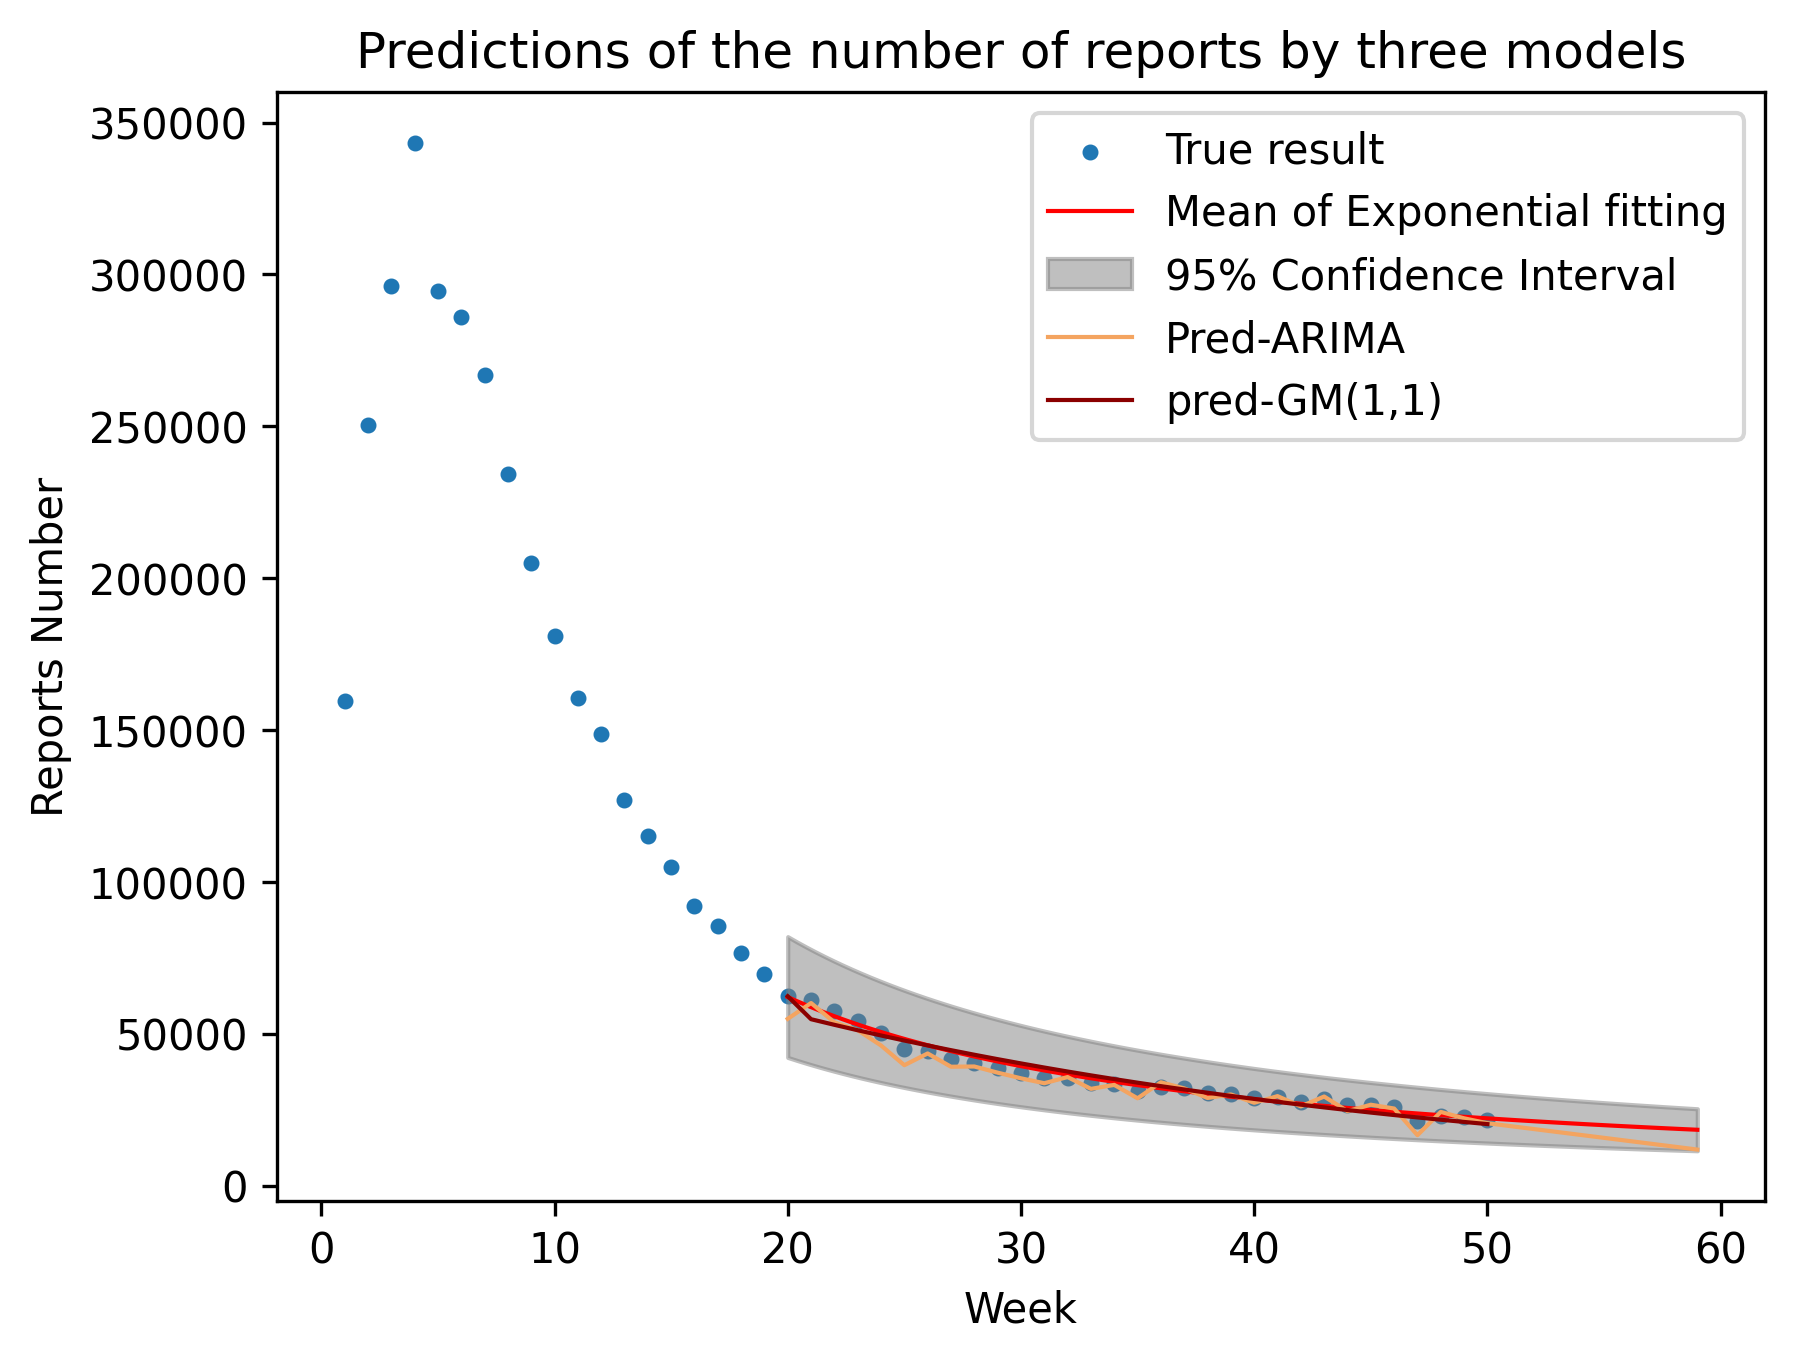

In [ ]:
# 绘制函数图像和置信区间

plt.figure(dpi=300)
plt.scatter(time_series['Week'],time_series['Number of result'],label='True result',s=8)
plt.plot(x_range, y_mean, 'r-', label='Mean of Exponential fitting',linewidth =1.0)
plt.fill_between(x_range, y_upper, y_lower, color='gray', alpha=0.5, label='95% Confidence Interval')

plt.plot(pred, label='Pred-ARIMA',color='#F4A460',linewidth =1.0)

plt.plot(range(20,51),x0_solve,label='pred-GM(1,1)',color='#8B0000',linewidth =1.0)


plt.legend(loc='best')
plt.xlabel('Week')
plt.ylabel('Reports Number')
plt.title('Predictions of the number of reports by three models')



# 单词属性

In [ ]:
#元音字母
for i in range(len(df_w)):
    a=0
    if df_w['l1'].loc[i] in ['a','e','u','i','o']:
        a=a+1
    if df_w['l2'].loc[i] in ['a','e','u','i','o']:
        a=a+1
    if df_w['l3'].loc[i] in ['a','e','u','i','o']:
        a=a+1
    if df_w['l4'].loc[i] in ['a','e','u','i','o']:
        a=a+1
    if df_w['l5'].loc[i] in ['a','e','u','i','o']:
        a=a+1
    df_w['yuan'].loc[i]=a

In [ ]:
#重复单词
for i in range(len(df_w)):
    a=0
    repeat=[df_w['l1'].loc[i],df_w['l2'].loc[i],df_w['l3'].loc[i],df_w['l4'].loc[i],df_w['l5'].loc[i]]
    for j in range(5):
        if repeat[j]!=repeat[j-1]:
            a=a+df_w['word'].loc[i].count(repeat[j])-1
        elif repeat[j]==repeat[j-1]:
            a=a+1
    df_w['repeat'].loc[i]=a
    

C:\Users\86198\AppData\Local\Temp\ipykernel_21800\1171382167.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['repeat'].loc[i]=a


## 绘图

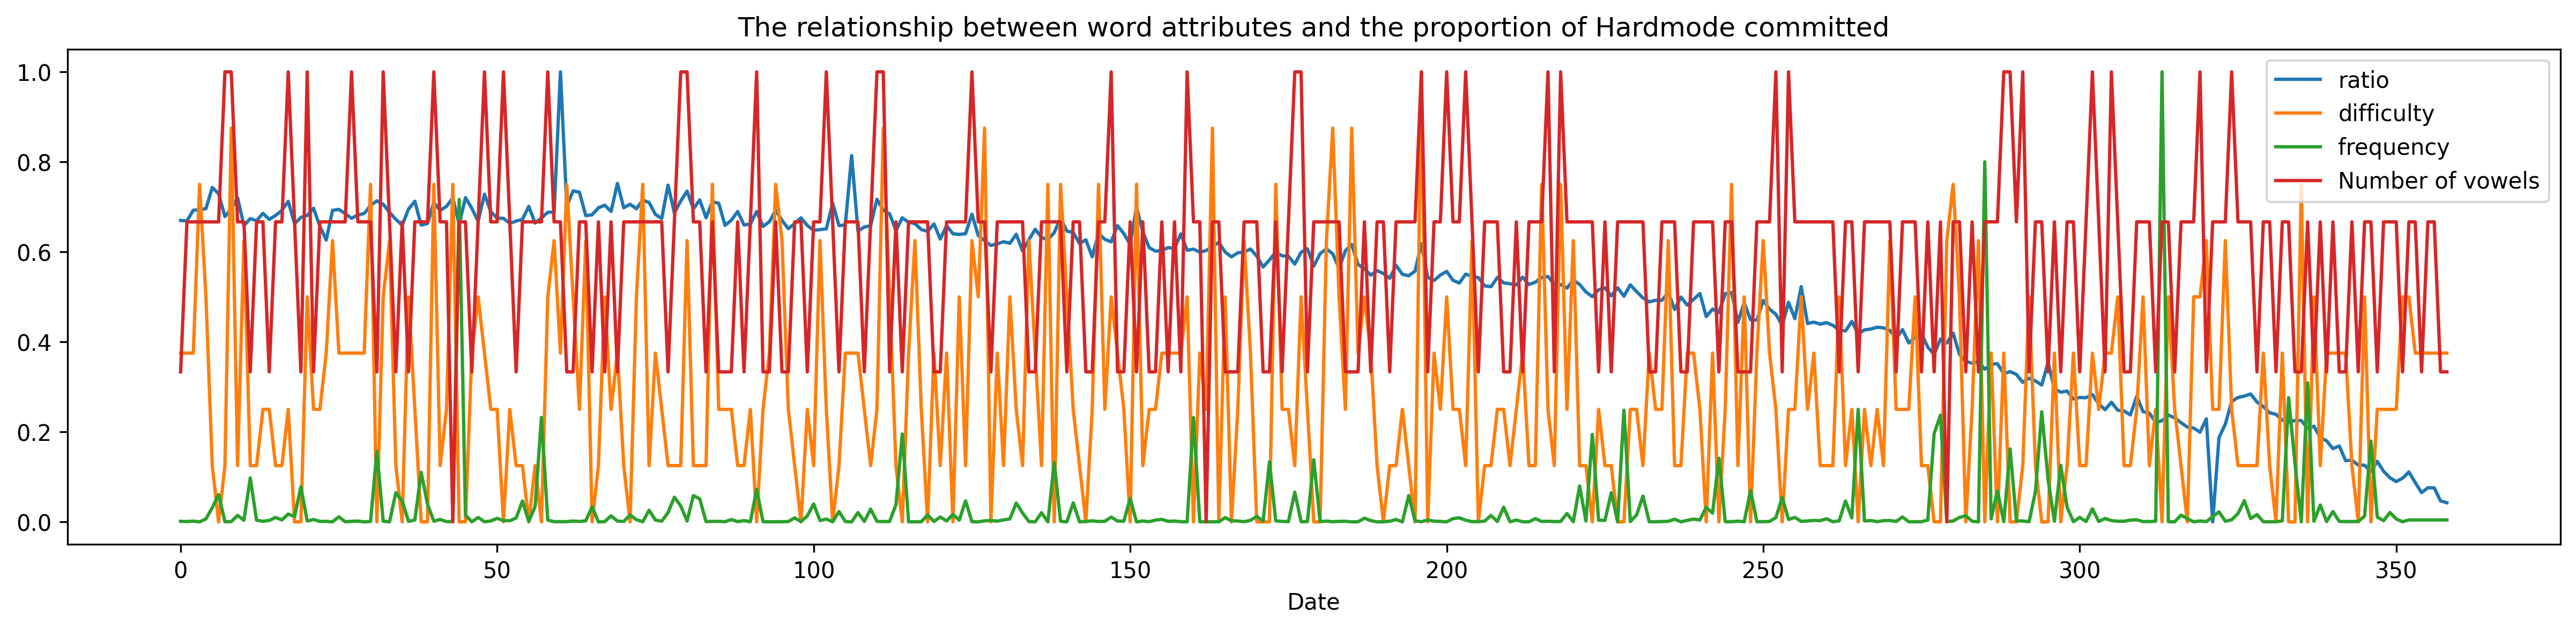

In [ ]:
df_w[['freq','cluster','yuan','rata']]= (df_w[['freq','cluster','yuan','rata']]-df_w[['freq','cluster','yuan','rata']].min())/(df_w[['freq','cluster','yuan','rata']].max()-df_w[['freq','cluster','yuan','rata']].min())
plt.figure(dpi=300,figsize=(20,4))
plt.plot(df_w['rata'],label='ratio')
plt.plot(df_w['cluster'],label='difficulty')
plt.plot(df_w['freq'],label='frequency')
plt.plot(df_w['yuan'],label='Number of vowels')
plt.title('The relationship between word attributes and the proportion of Hardmode committed')
plt.xlabel('Date')
plt.legend()

# 预测通关比例

In [ ]:
def pred_pro(difficulty,try_number):
    str_try=str(try_number)+' try'
    trys=wordle[str_try].loc[wordle['cluster']==difficulty].to_numpy()
    mini=[]
    flag=0
    for i in range(500):
        temp=0
        for j in range(len(trys)):
            temp=temp+(i*0.1-trys[j])**2
        mini.append(temp)
    return round(mini.index(min(mini))*0.1,1)


In [ ]:

for i in range(1,11):
    a=[]
    for j in range(1,8):
        a.append(pred_pro(i,j))
    wordle_try['t'+str(i)]=np.array(a)


In [ ]:
def pred_pro(difficulty,try_number):
    str_try=str(try_number)+' try'
    trys=wordle[str_try].loc[wordle['cluster']==difficulty].to_numpy()
    mini=[]
    flag=0
    for i in range(500):
        temp=0
        for j in range(len(trys)):
            temp=temp+(i*0.1-trys[j])**2
        mini.append(temp)
    return min(mini)

In [ ]:
pred_pro(2,4)

2014.5599999999995

## 绘图

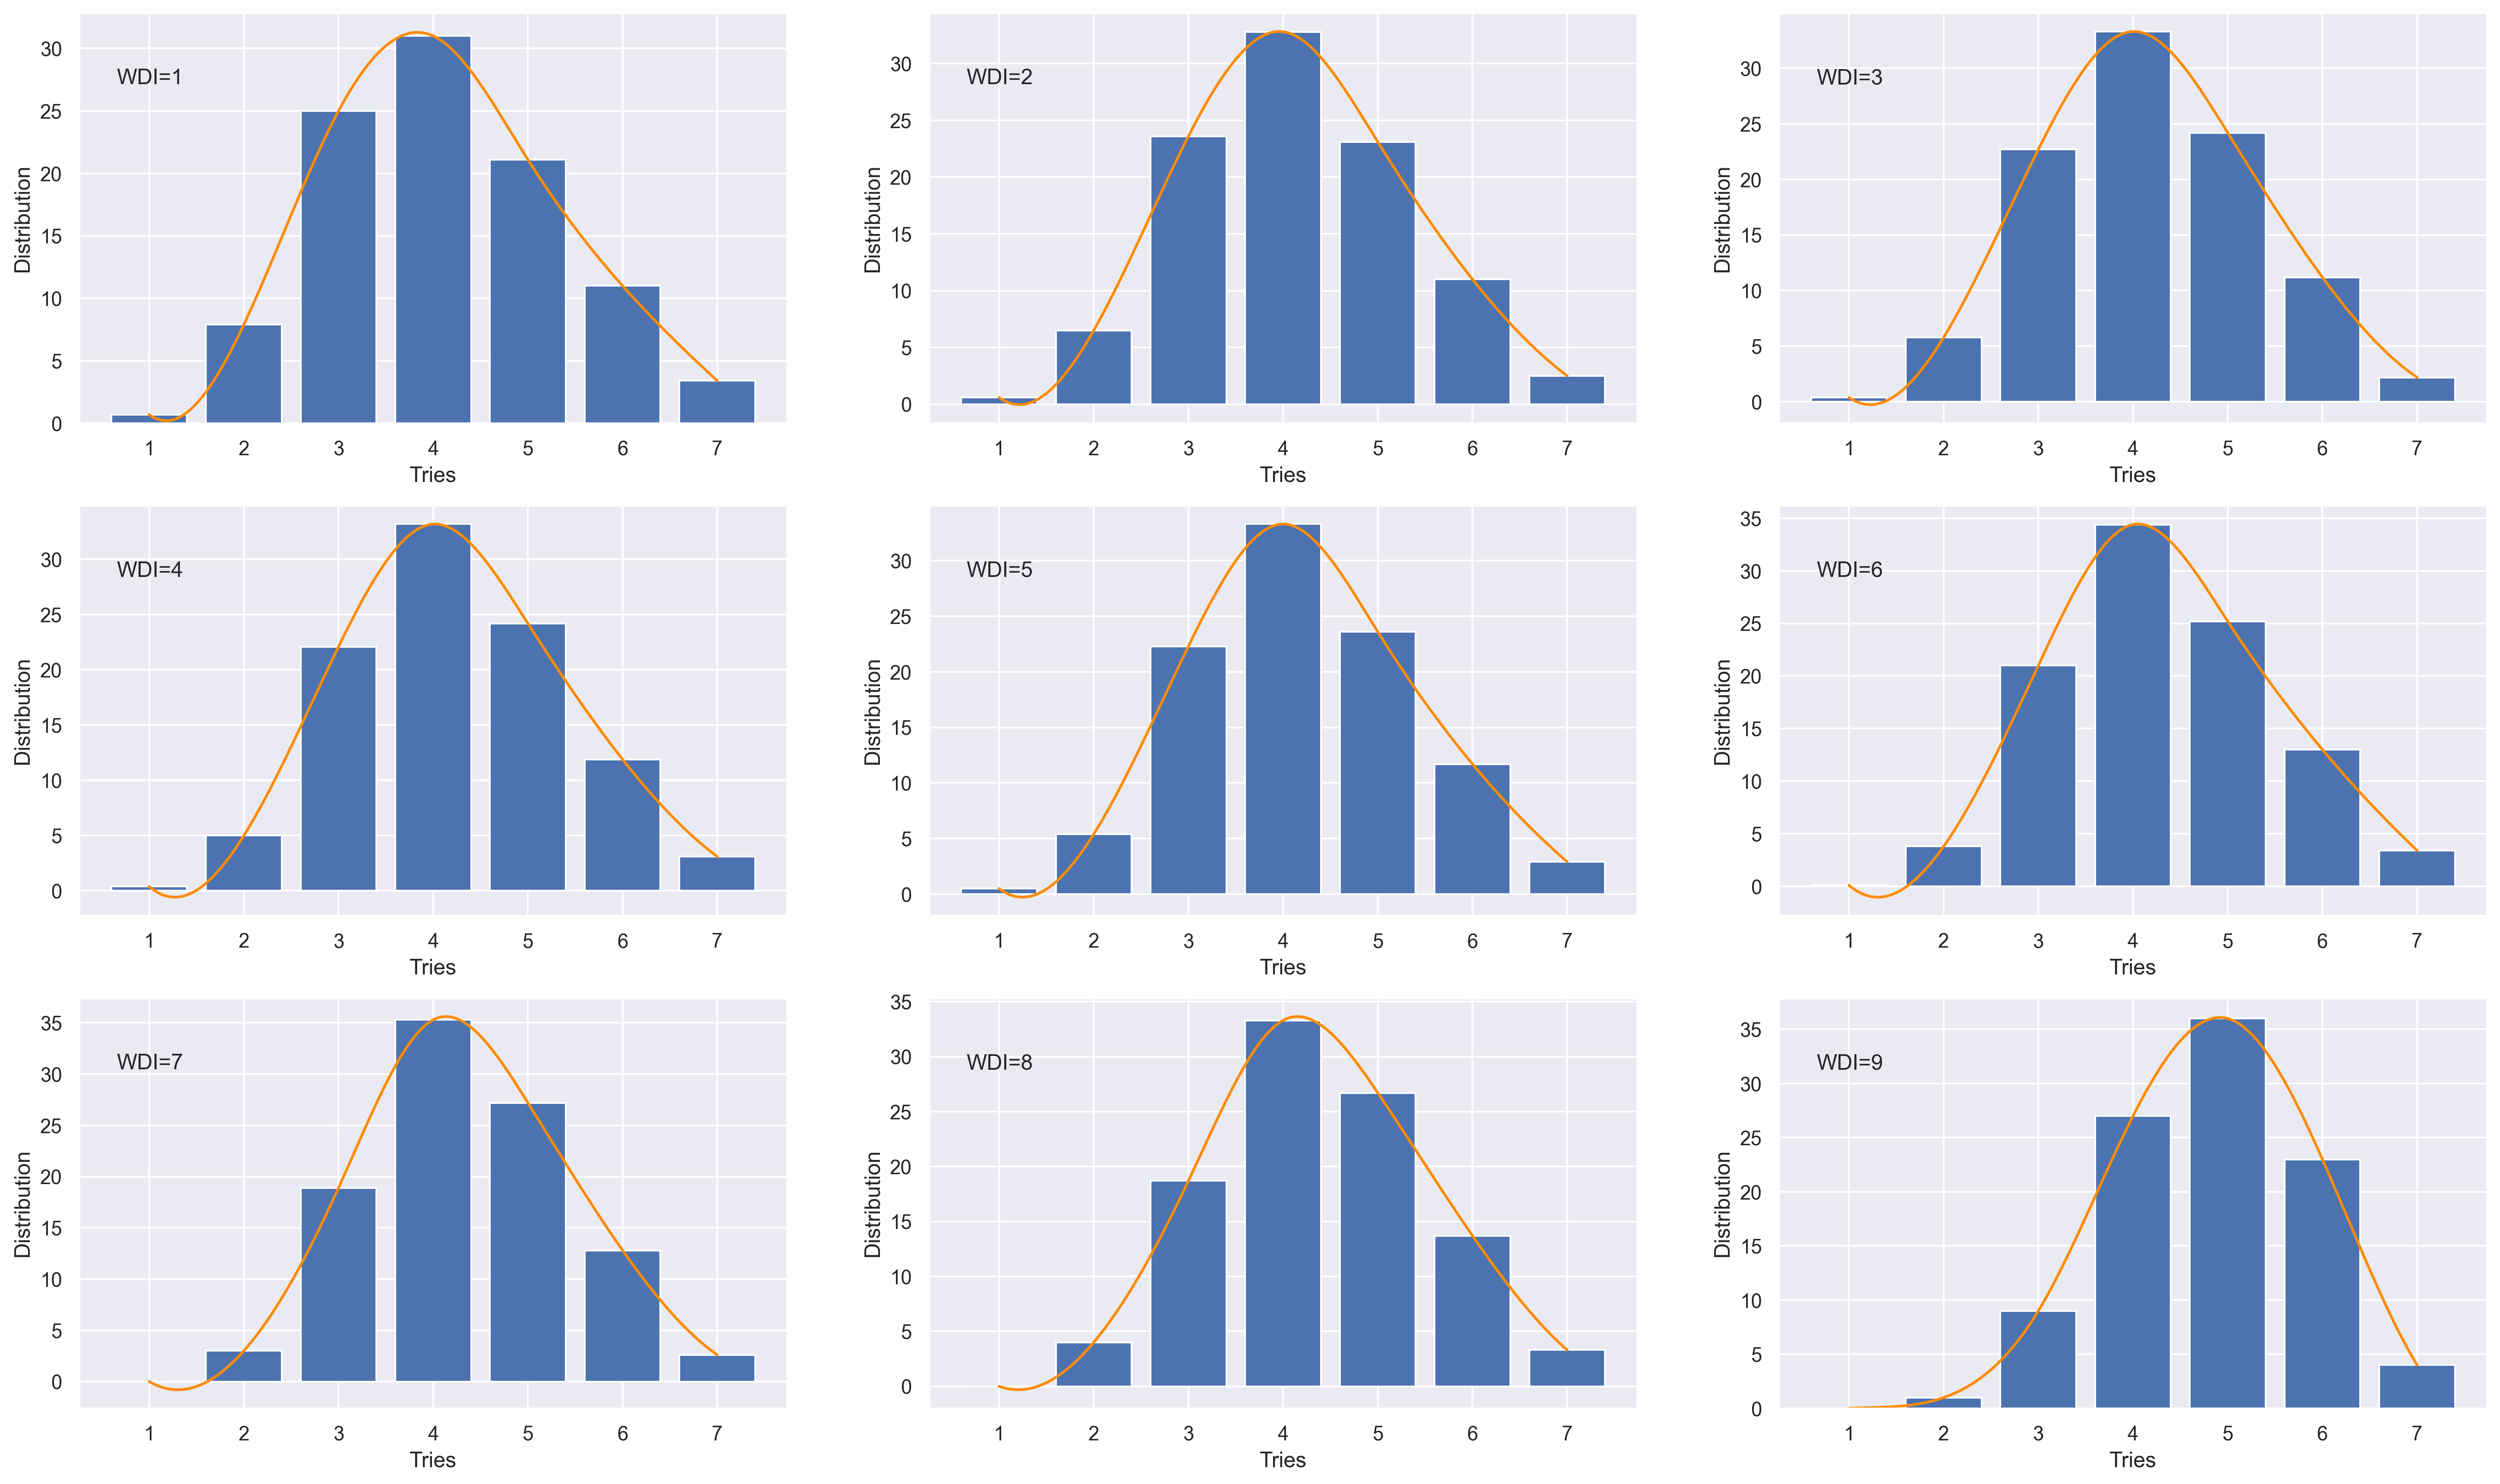

In [ ]:
from scipy.interpolate import make_interp_spline

plt.figure(dpi=300,figsize=(24,14))
for i in range(1,10):
    plt.subplot(3,3,i)
    data = wordle_try['d'+str(i)]
    plt.bar(['1','2','3','4','5','6','7'],data)

    # 计算并绘制趋势曲线
    x = np.array(data.index)
    y = np.array(data)
    spl = make_interp_spline(x, y)
    x_new = np.linspace(x.min(), x.max(), 300)
    y_new = spl(x_new)
    plt.plot(x_new, y_new, color='#FF8C00')
    plt.xlabel('Tries')
    plt.ylabel('Distribution')
    plt.title('WDI='+str(i),x=0.1,y=0.8)

# 显示图像
plt.show()


# 其他绘图

## 偏态分布绘图

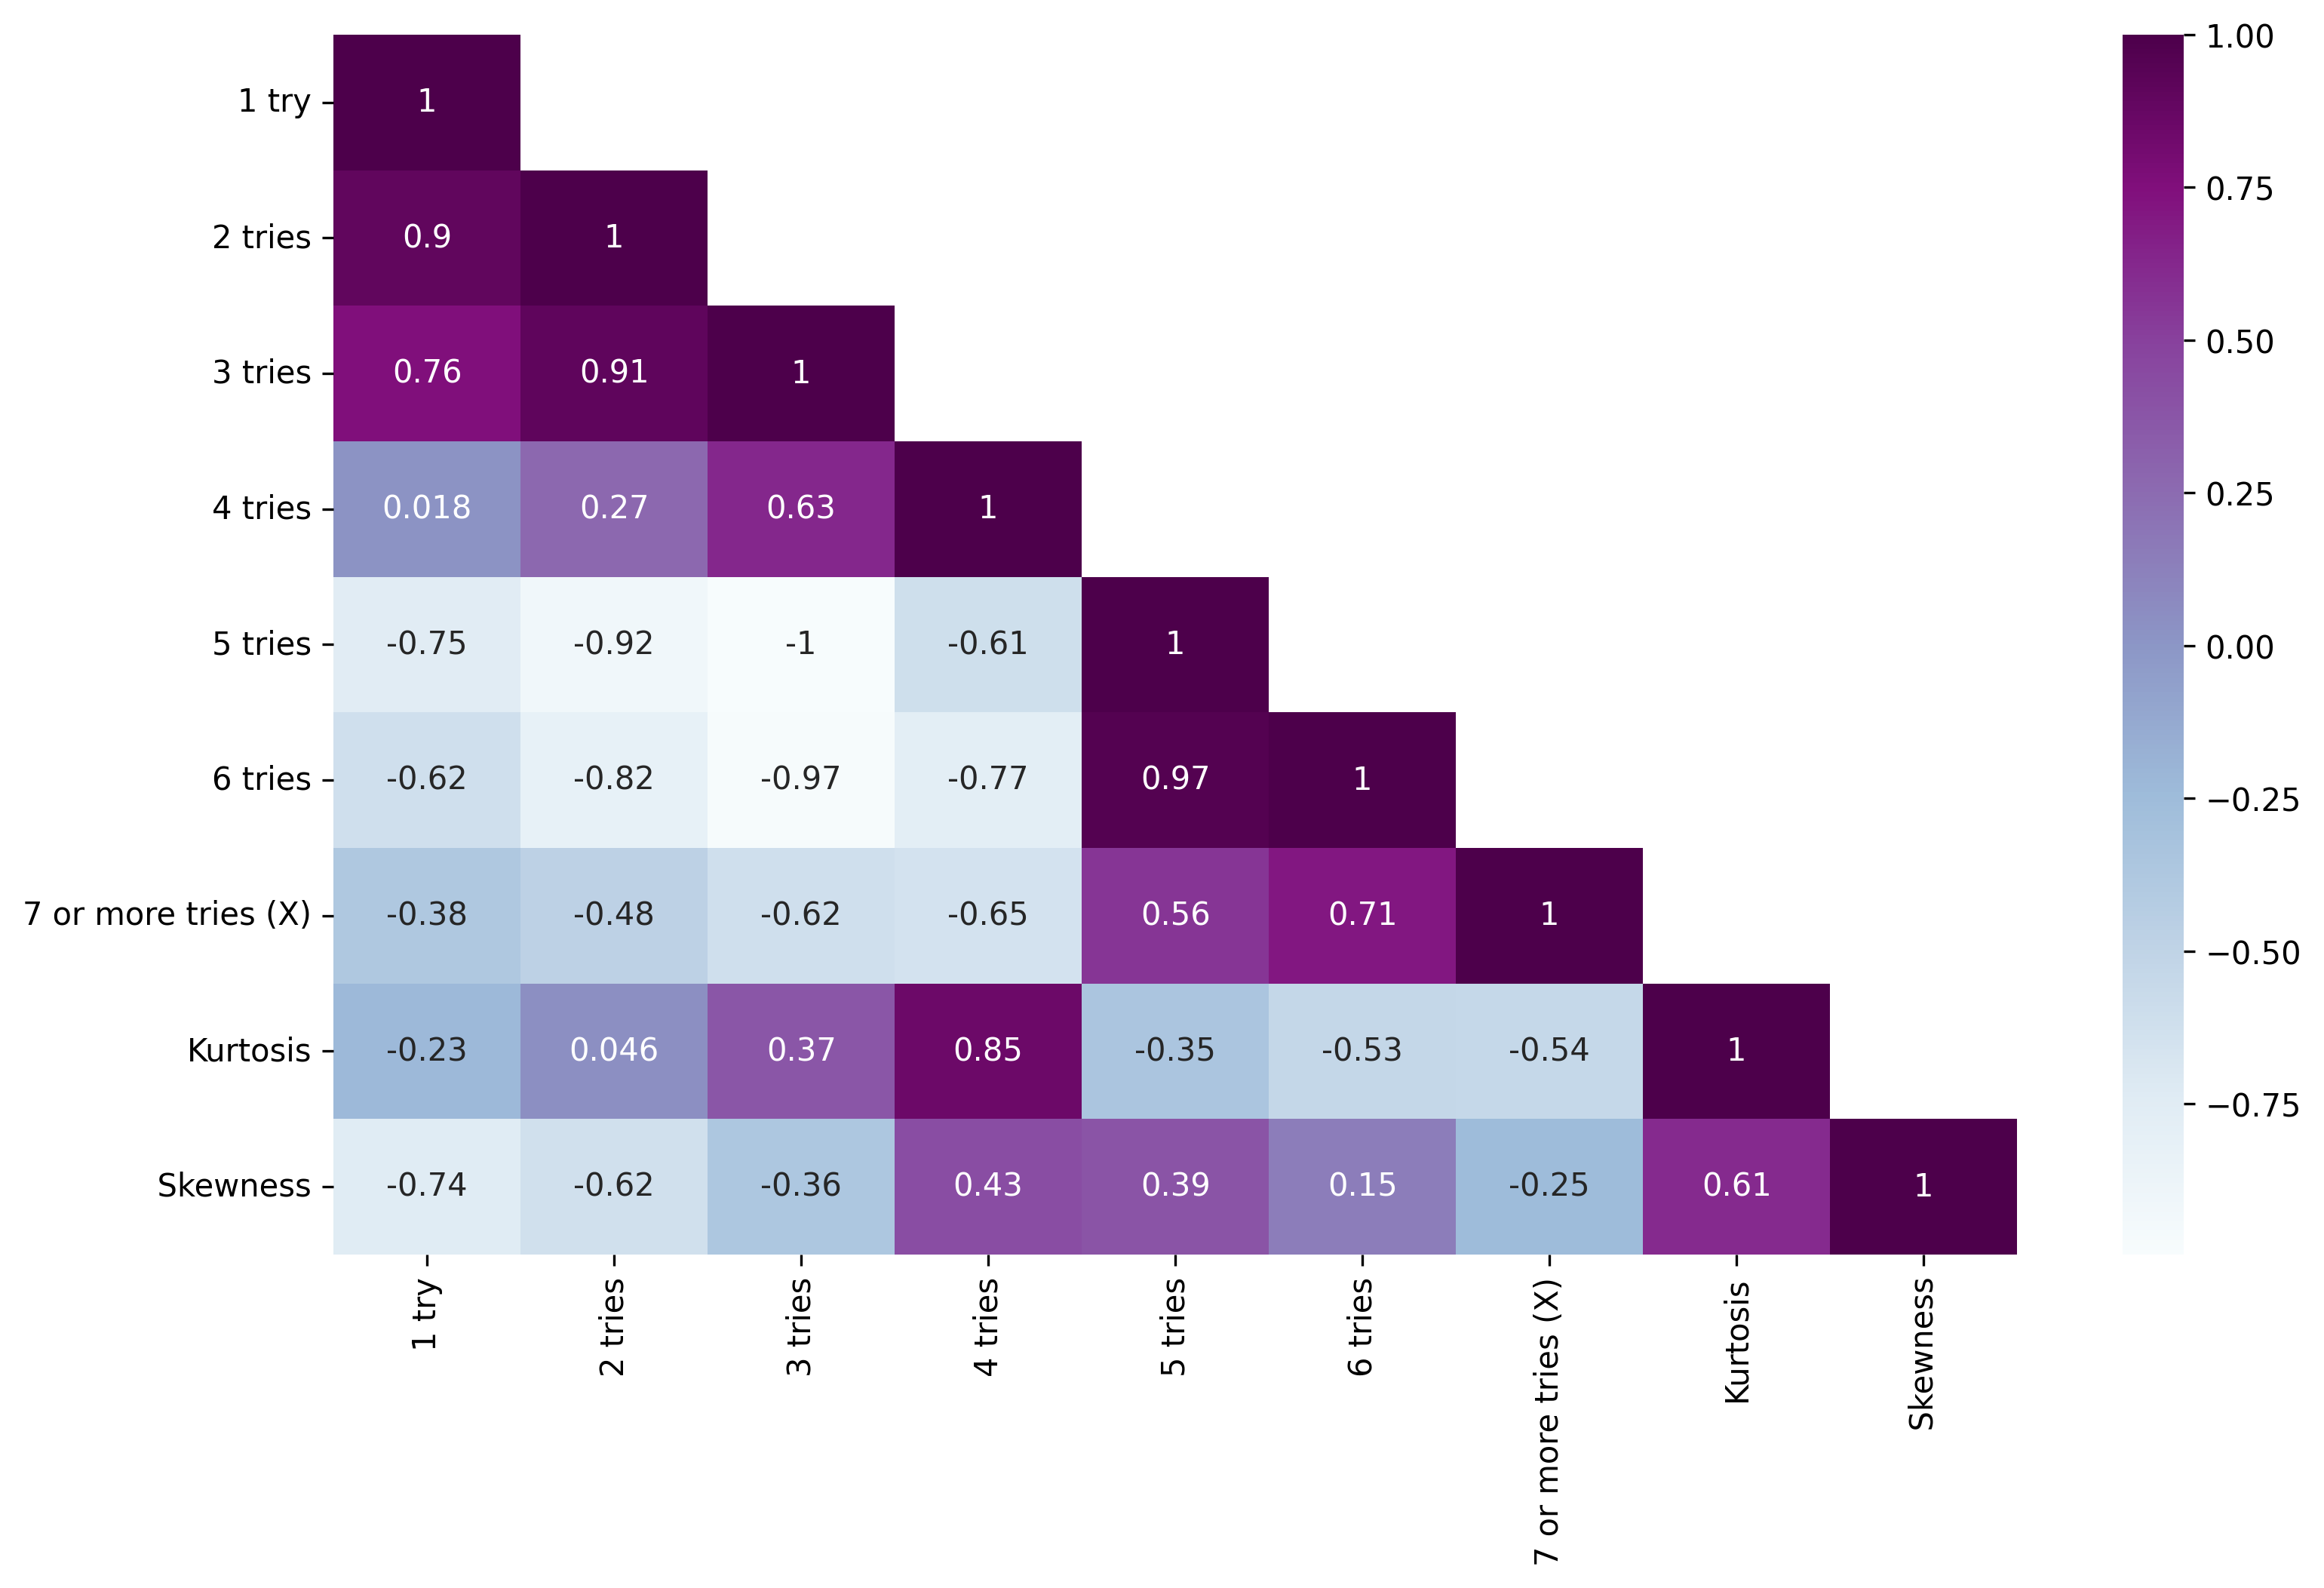

In [ ]:

df = pd.read_excel('峰度(2).xlsx')

plt.figure(dpi=300,figsize = (12,7))
#自定义x轴
x_ticks=df.columns
#自定义y轴 

y_ticks = df.columns
ax = sns.heatmap(df, annot=True, cmap="BuPu",xticklabels=x_ticks, yticklabels=y_ticks)
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=10)
plt.title("")

# 显示图片
plt.show()

## 困难模式百分比和时间折线图

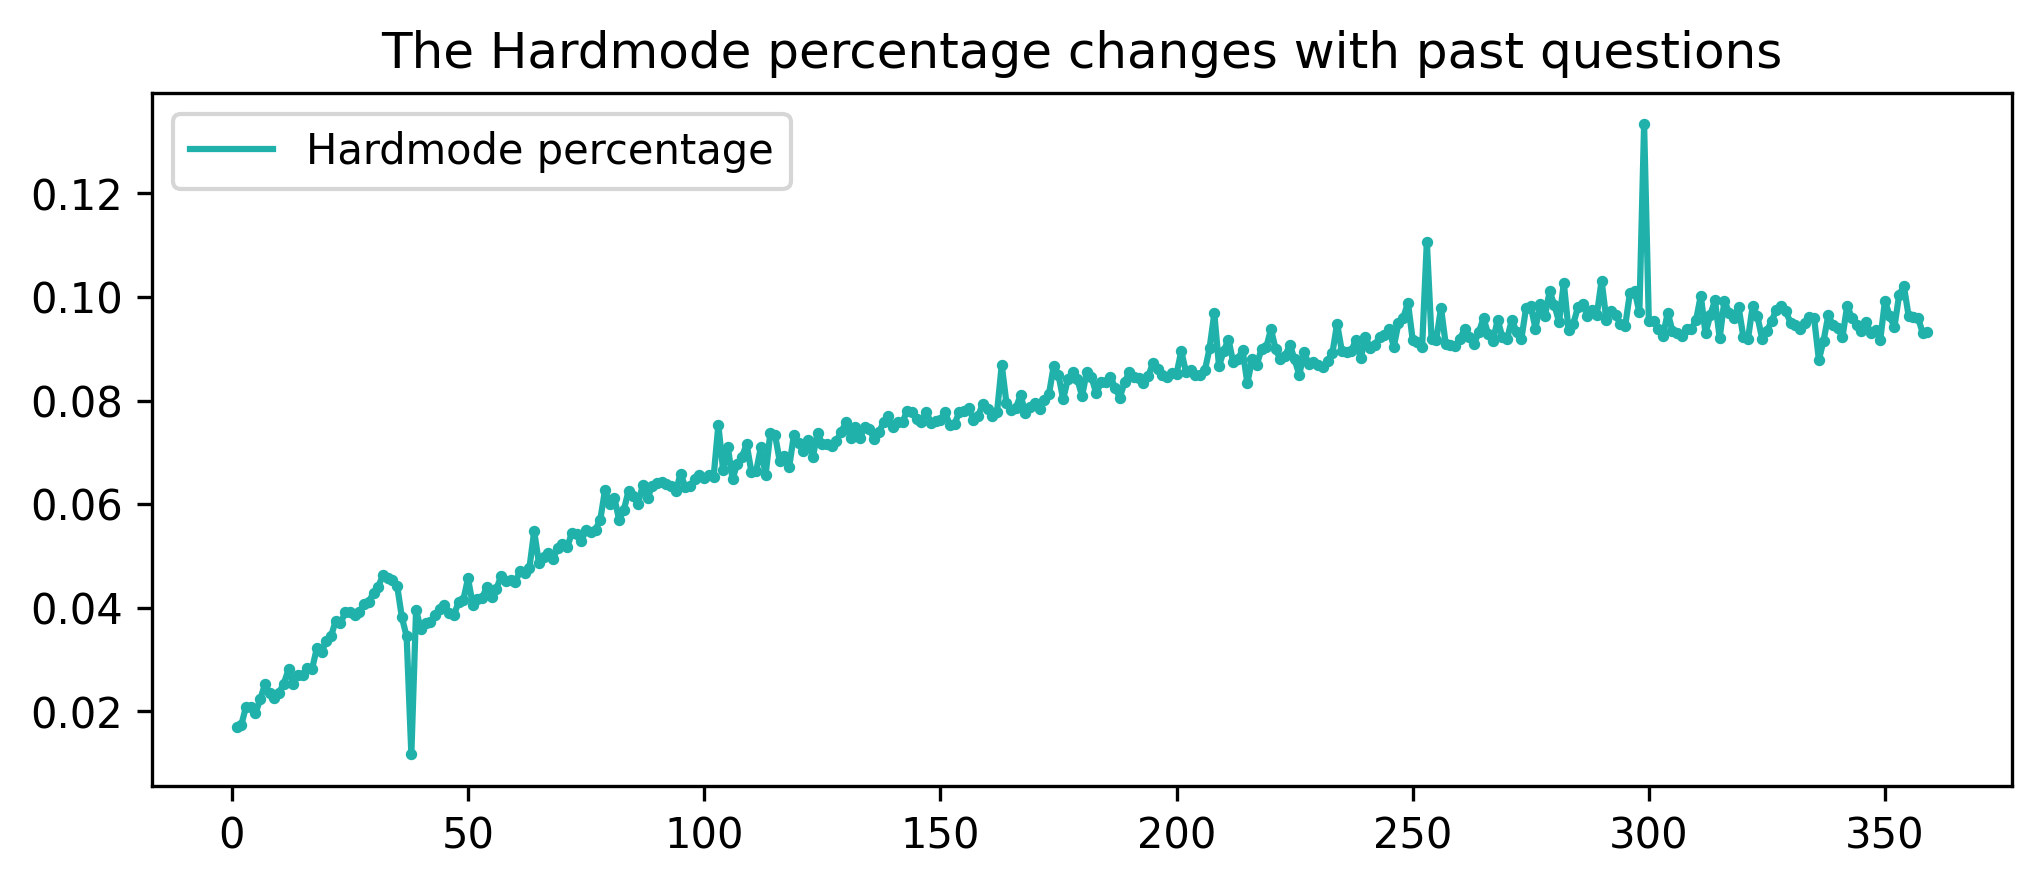

In [ ]:
df=pd.read_excel('折线图.xlsx')
plt.figure(dpi=300,figsize=(8,3))
plt.scatter(df['Contest number'],df['hard mode'],s=3,color='#20B2AA')
plt.plot(df['Contest number'],df['hard mode'],color='#20B2AA',label='Hardmode percentage')

plt.title('The Hardmode percentage changes with past questions')
plt.legend()

plt.show()

## 发音和困难指数

Text(0.5, 1.0, 'Hard Mode Proportion under Different Word difficulty')

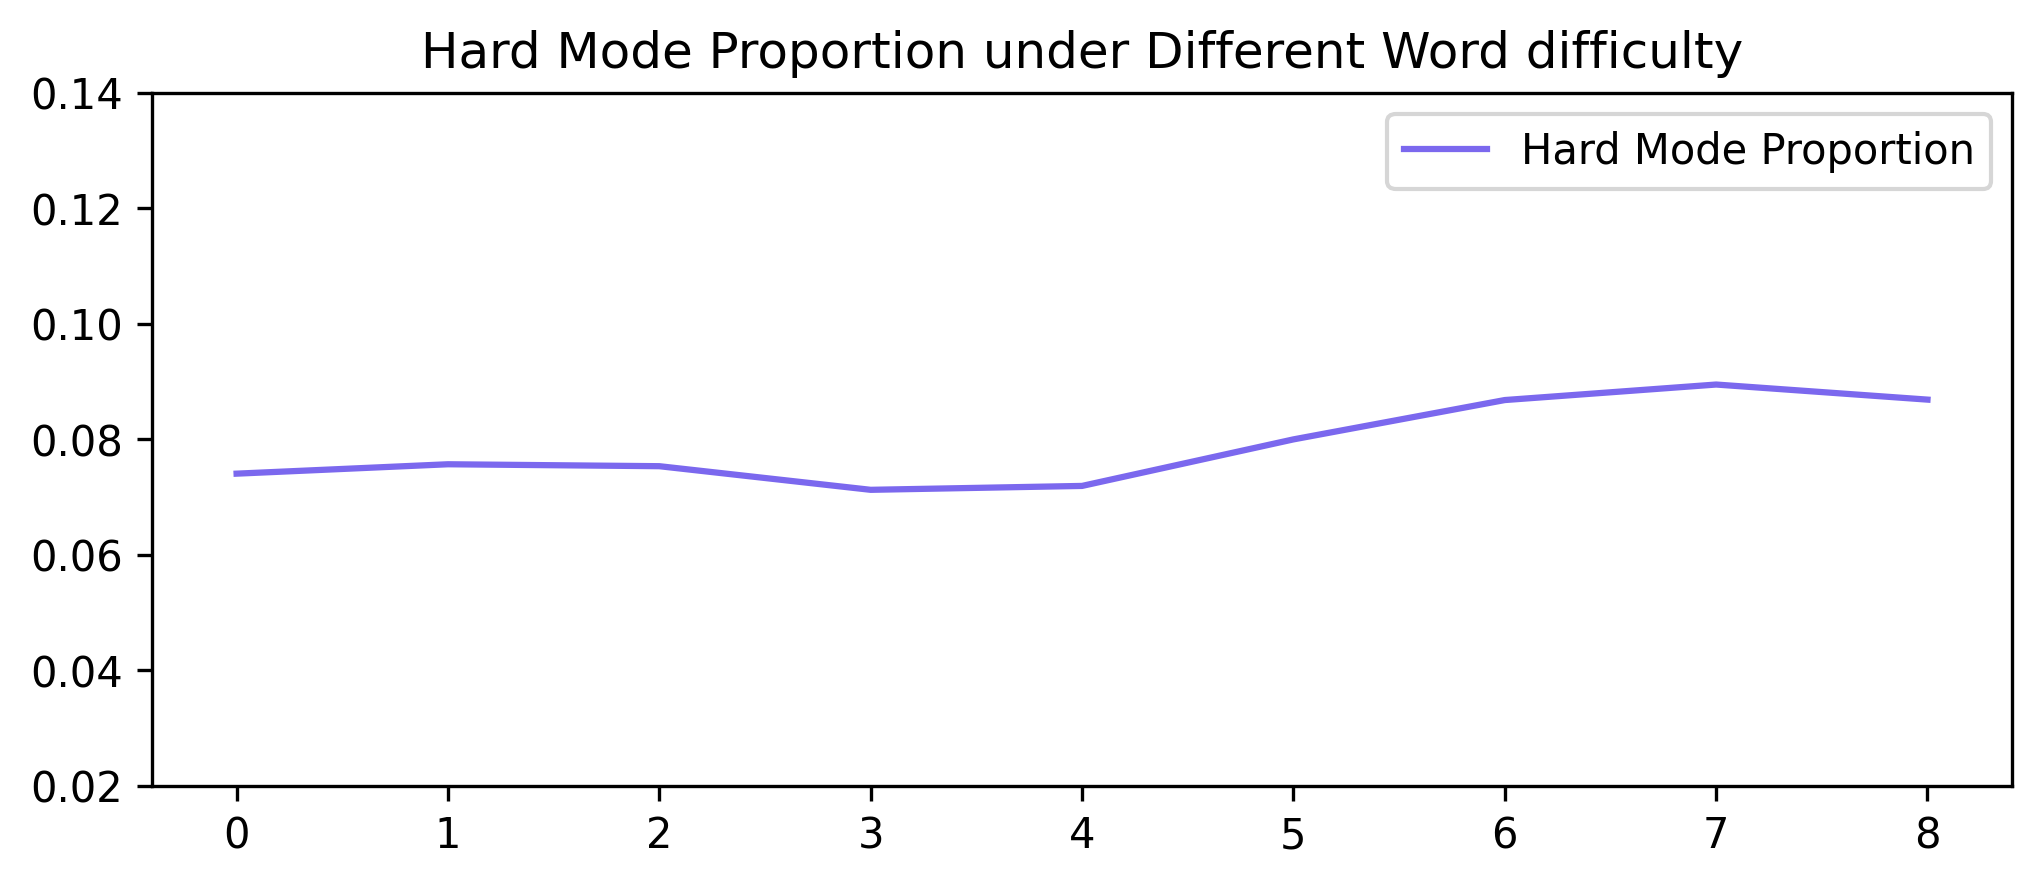

In [ ]:
x=range(1,11)
y=[0.0740559,
0.07568426,
0.07534914,
0.07125784,
0.07193215,
0.07998976,
0.0868022,
0.0894891,
0.08687639]
plt.figure(dpi=300,figsize=(8,3))
plt.plot(y,label='Hard Mode Proportion',color='#7B68EE')
plt.ylim(0.02,0.14)
plt.legend()

plt.title('Hard Mode Proportion under Different Word difficulty')
